# Introduction

Attrition in business means the reduction of staff and employees in a company. Employers generally consider attrition a loss of valuable employees and talents. Therefore, the director of human resources is interested in finding out the level of employees’ attrition and what to improve within the company in order to increase the level of employees’ satisfaction, performance for getting a better return on investment.

# Business Question

The director of human resources is interested in knowing the factors that lead to employee attrition and he wants to see which variables are contributing the most in attrition. His main question is:

**“Do employees with lower income tend to leave?”**

For this study we are going to have a closer look at the feature distributions, how correlated one feature is to the other and create some visualisations.

The HR managers and employers are the main audience of this research, who can provide some positive solutions to reduce the attrition rate.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Get the Data

“IBM HR Analytics Employee Attrition & Performance” dataset is used for this project. The dataset is available to downloaded from Kaggle under the following webpage:
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Read in the downloaded csv file as DataFrame called emp.**

In [3]:
employees = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

**Check the head of employees, and check out its info() and describe() methods.**

In [4]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employees.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Exploratory Data Analysis

**Attrition** is our main feature to focus in order to answer the business question. So, let's look at the attrition rate!

In [7]:
employees.Attrition.value_counts(normalize = True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Based on the above results, approximately **16%** of the employees left the company and only **84%** of them are still working.

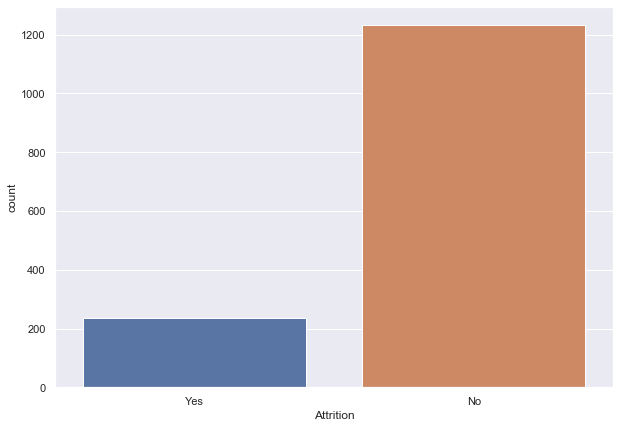

In [8]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(x='Attrition', data = employees)

Around **235 employees** left the company! Now let's see how this population is distributed in respect with gender!

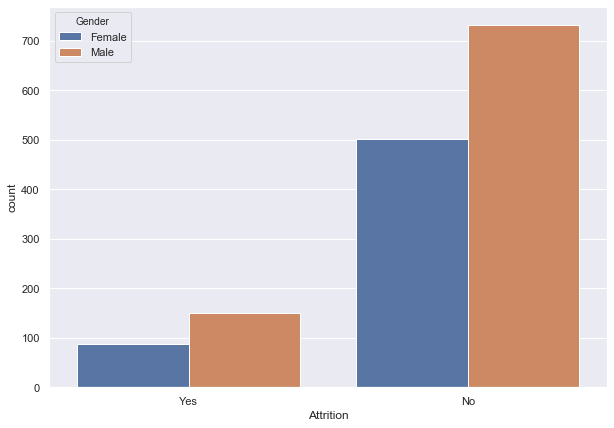

In [9]:
sns.countplot(x = 'Attrition', data = employees, hue = 'Gender')

Above graph shows that more male employees left the company in compare with female employees. Now that we know about the attrition rate between men and women, let's dive into each department and see which department has the higher rate of attrition!

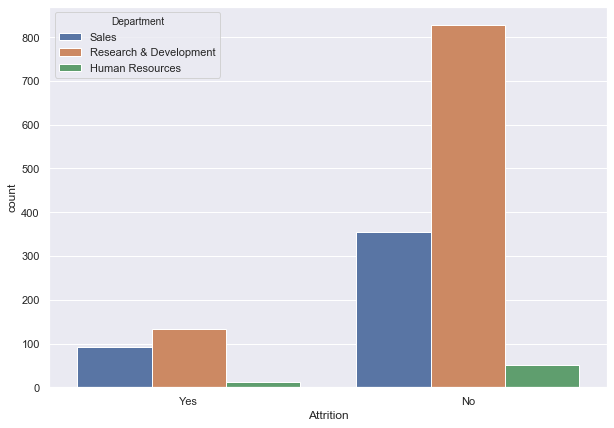

In [10]:
sns.countplot(x = 'Attrition', data = employees, hue = 'Department')

Above graph shows the Attrition rate within three existing departments. It shows that the department of **Research & Development** has the highest rate of attrition, and after that departments of Sales and Human Resources accordingly.

It would be interesting to see the attrition rate in respect with the field of education.

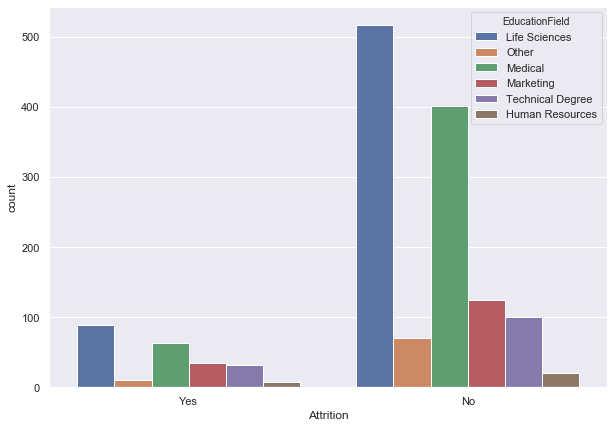

In [11]:
sns.countplot(x = 'Attrition', data = employees, hue = 'EducationField')

According to the above graph, the higher rate of attrition is for those group of employees with education field of **Life Sciences**.

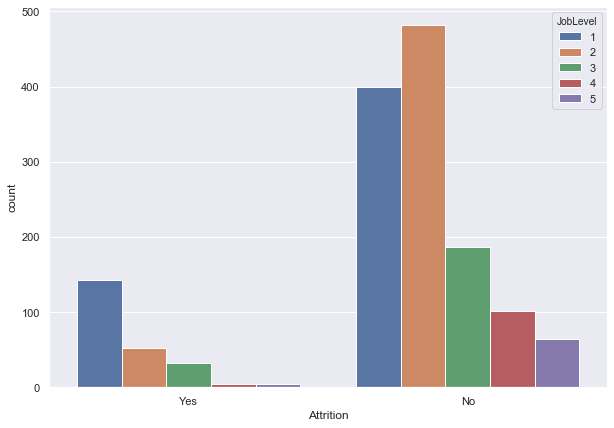

In [12]:
sns.countplot(x = 'Attrition', data = employees, hue = 'JobLevel')

The big population of employees, who left the company, are associated with **Job Level 1** and it makes sense as they are mostly the interns or contractors.

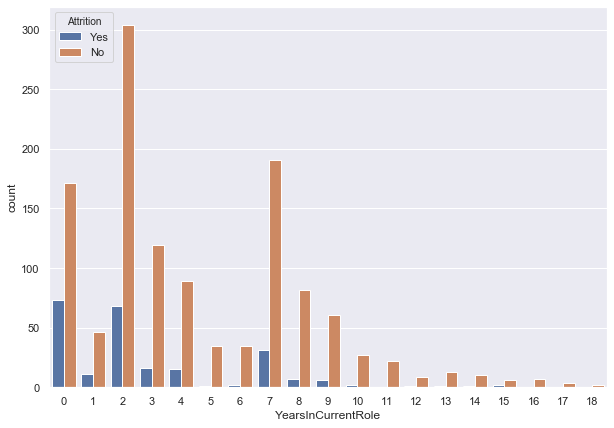

In [13]:
sns.countplot(x = 'YearsInCurrentRole', data = employees, hue = 'Attrition')

According to the above graph, the attrition rate is higher within the employees, who just started or those, who are in their current roles for two years.

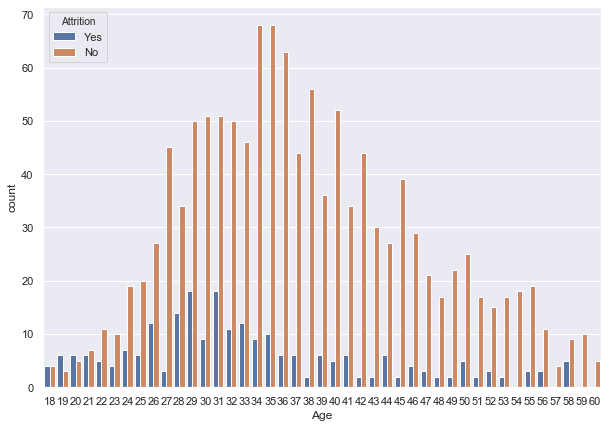

In [14]:
sns.countplot(x = 'Age', data = employees, hue = 'Attrition')

Employees from **28 years old** to **35 years old** have the higher rate of attrition. 

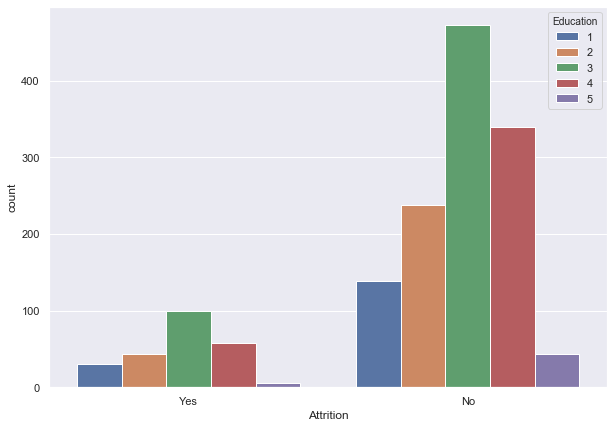

In [15]:
sns.countplot(x = 'Attrition', data = employees, hue = 'Education')

Emoloyees with **Bachelor** degree have the higher rate of attrition.

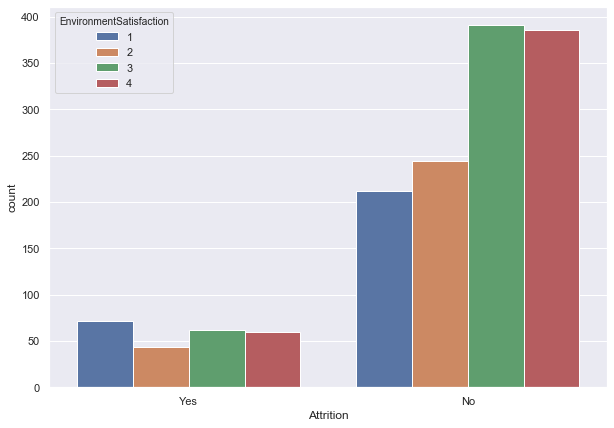

In [16]:
sns.countplot(x = 'Attrition', data = employees, hue = 'EnvironmentSatisfaction')

The above graph shows that the **Environment Satisfaction** doesn't play a big role in attrition rate. 

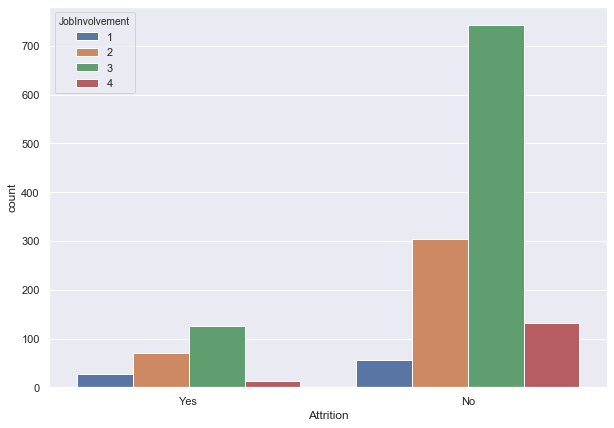

In [17]:
sns.countplot(x = 'Attrition', data = employees, hue = 'JobInvolvement')

Those employees with **high job involvement** have the higher rate of attrition!

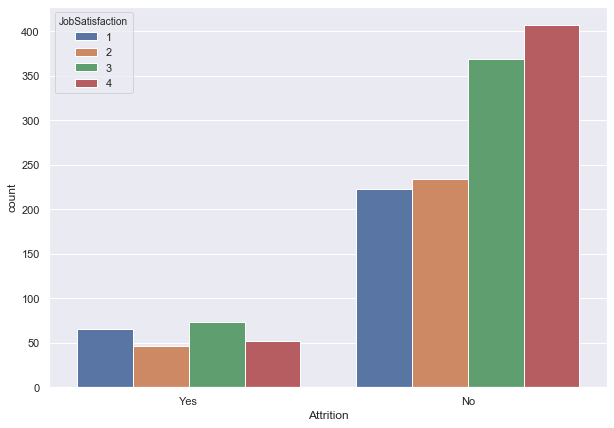

In [18]:
sns.countplot(x = 'Attrition', data = employees, hue = 'JobSatisfaction')

According to the above graph, we cannot confidently say that employees leave because they are not happy.

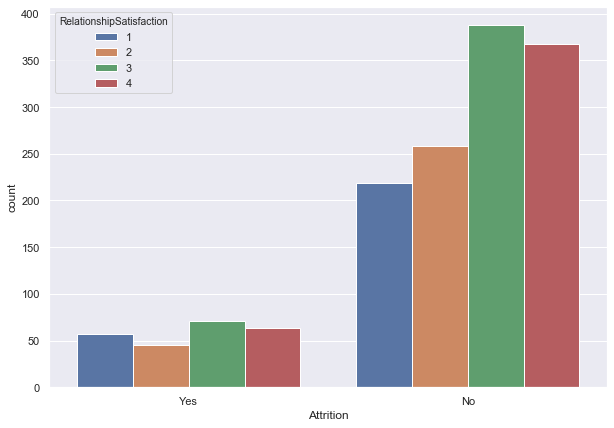

In [19]:
sns.countplot(x = 'Attrition', data = employees, hue = 'RelationshipSatisfaction')

Also the relationship satisfaction doesn't play a big role in employees attrition rate.

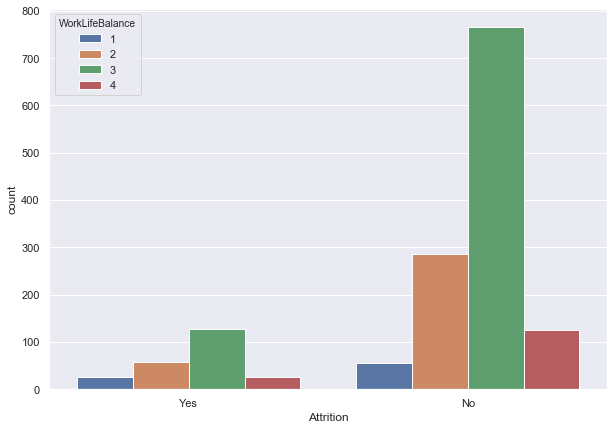

In [20]:
sns.countplot(x = 'Attrition', data = employees, hue = 'WorkLifeBalance')

It is interesting that employees with better work/life balance have the higher attrition rate.

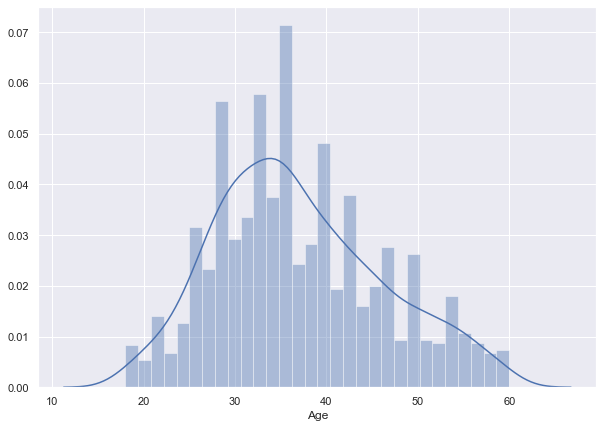

In [21]:
sns.distplot(employees['Age'], bins = 30)

The above graph shows that the **Age** feature is quite normally distributed and **average age** of employees is around **36**.

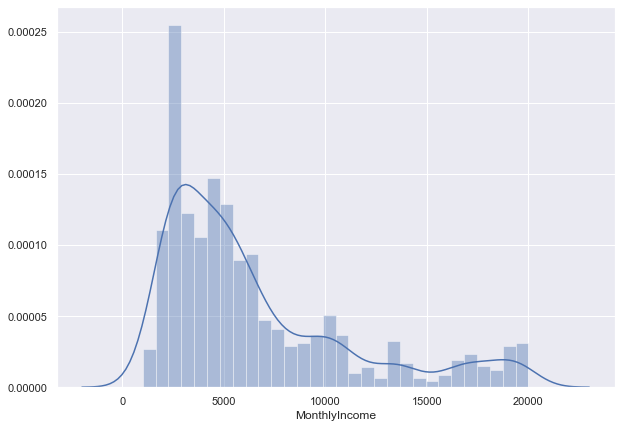

In [22]:
sns.distplot(employees['MonthlyIncome'], bins = 30)

The above distribution graph is positively skewed, and it shows that the majority of **incomes** are around **$5000.00** per month.

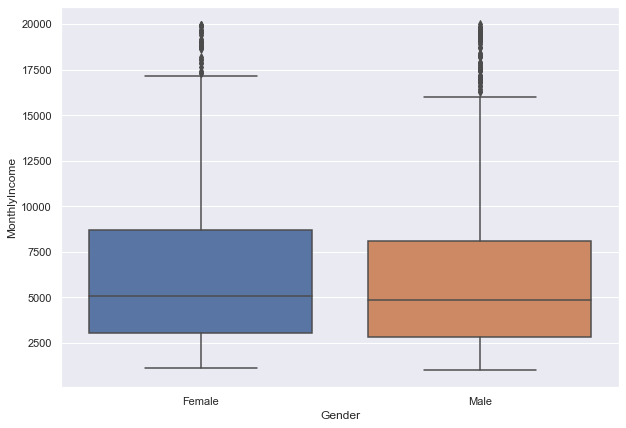

In [23]:
sns.boxplot(y = "MonthlyIncome", x = "Gender", data = employees)

Above graph shows that the common monthly income for male and female employees are in the same range.

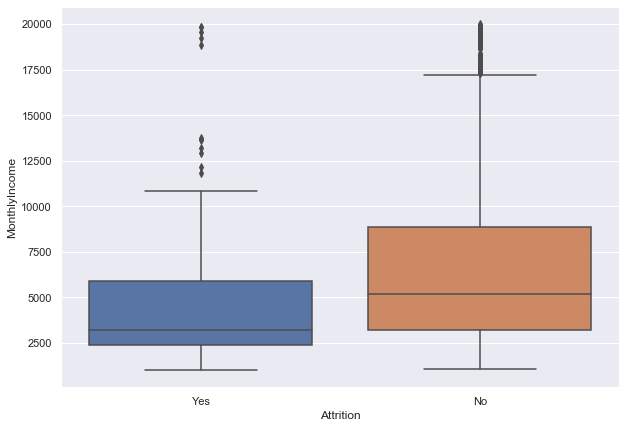

In [24]:
sns.boxplot(y = "MonthlyIncome", x = "Attrition", data = employees)

However, those employees, who left the company had lower monthly income.

# Conclusion

- Young/new employees have the higher attrition rate. Most of them are interns or contractors. Company could have a solid plan to absorb the talented interns as their future assets.
- Those employees, who work at the department of Research and Development with background of Life Sciences have the higher attrition rate.
- The salary plays a big role in attrition rate. Those employees with lower income tend to leave the company.
- Those employees with high job involvement have the higher attrition rate. The company should come up with a solution to lower the pressure and keep these valuable employees.